# Tejas A

# Task 2
## Sparks foundation 

## Color Identification in Images

(Level - Beginner)

● Implement an image color detector which identifies all the colors in an
image or video.

● Below resources are just for references you can use any library/approach
to achieve the goal.

● Resources: https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71


### Color Identification using Machine Learning

In this notebook, I have used machine learning algorithm, KMeans, to extract colors from a give image. I will use OpenCV2 for image manipulation, apply KMeans to identify the major colors and then plot the information using Matplotlib.




### Import libraries

Let's first import necessary libraries. We need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs, numpy to work with arrays, cv2 to work with image data, collections to use Counter to count values, rgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors.


In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

The type of this input is <class 'numpy.ndarray'>
Shape: (656, 875, 3)


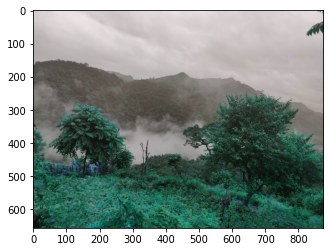

In [2]:
image = cv2.imread('1 lSvFUirQRKEI1TKN_BBVFA.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


Converting the colour from BGR to RGB

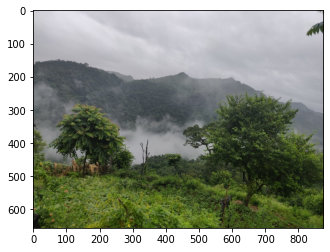

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Following function helps to obtain the color 

In [4]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

The below function helps to read the image and convert into RGB 

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

The following function helps to get the values of the colour.

In [6]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([32.25914062, 41.75955906, 20.74801604]),
 array([182.33960106, 182.78605105, 189.72637746]),
 array([112.91768062, 118.15848821, 115.18135223]),
 array([ 97.99885085, 114.61737201,  48.49338247]),
 array([206.75929298, 206.43188385, 213.94690072]),
 array([62.49218552, 76.74434342, 34.90330303]),
 array([148.21315167, 150.23826146, 151.995496  ]),
 array([80.96426049, 87.82868343, 88.52048312])]

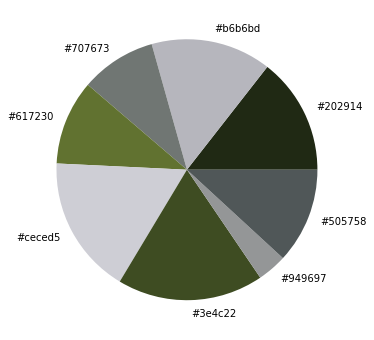

In [7]:
get_colors(get_image('1 lSvFUirQRKEI1TKN_BBVFA.jpeg'), 8, True)


Search images using Color

From the model above, we can extract the major colors. This create the opportunity to search for images based on certain colors. We can select a color and if it's hex matches or is close to the hex of the major colors of the image, we say it's a match.

We first get all the images and store them in the images variable.


In [8]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

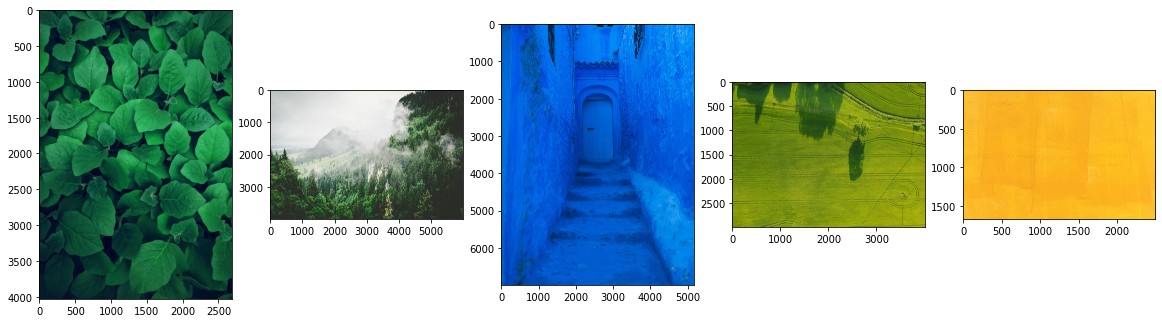

In [9]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])



In [10]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [11]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

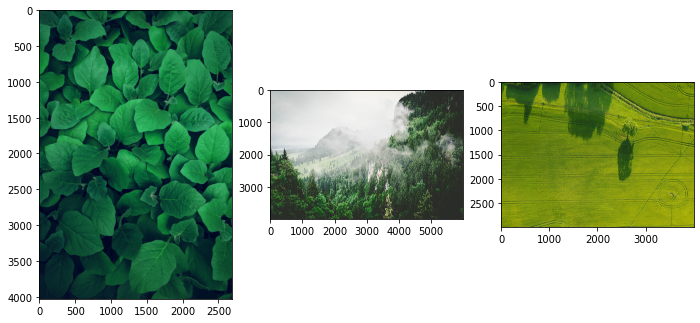

In [12]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

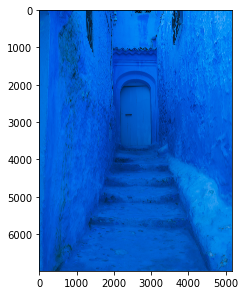

In [13]:


# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)



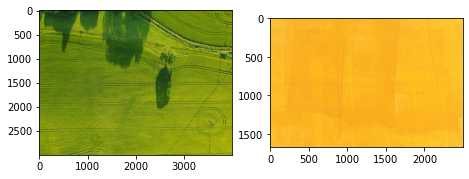

In [14]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)


#### Conclusion

In this notebook, we used KMeans to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.
